In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()
print(len(faces.data))
print(set(faces.target))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\qps98\scikit_learn_data
400
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


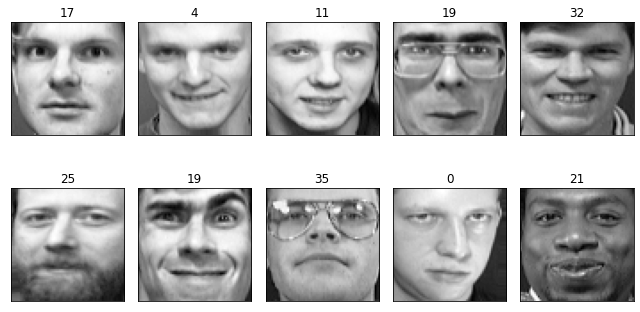

In [2]:
import matplotlib.pyplot as plt
import numpy as np
N=2
M=5
np.random.seed(0)
fig=plt.figure(figsize=(9,5))
klist=np.random.choice(range(len(faces.data)), N*M)
for i in range(N):
    for j in range(M):
        k=klist[i*M+j]
        ax=fig.add_subplot(N,M,i*M+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.gray)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
stratify=faces.target, test_size=0.2, random_state=0)

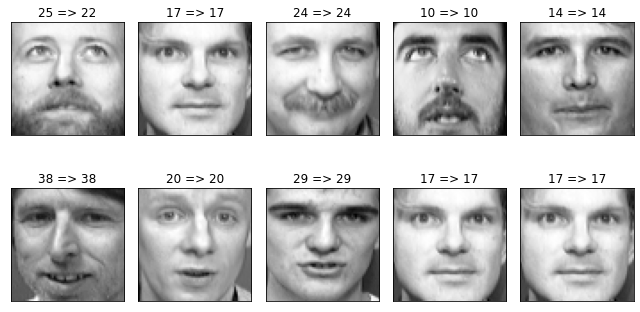

In [5]:
from sklearn.svm import SVC
svc=SVC().fit(X_train,y_train)
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64),cmap=plt.cm.gray)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        pred=svc.predict(X_test[k:(k + 1), :])[0]
        plt.title(f"{y_test[k]} => {pred}")
plt.tight_layout()
plt.show()

In [6]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

1.0
0.95


In [7]:
from sklearn.metrics import classification_report
pred=svc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.metrics import confusion_matrix
y = [1, 0, 1, 1, 0, 1]
pred = [0, 0, 1, 1, 0, 1]
cm=confusion_matrix(y, pred)
print(cm)
tn,fp,fn,tp = confusion_matrix(y, pred).ravel()
print(tn,fp,fn,tp)

[[2 0]
 [1 3]]
2 0 1 3


In [9]:
from sklearn.metrics import precision_score
y = [0, 1, 0, 0]
pred = [0, 1, 1, 0]
ps=precision_score(y, pred)
print(ps)

0.5


In [10]:
from sklearn.metrics import recall_score
y = np.array([0, 1, 1, 0])
pred = np.array([0, 1, 0, 0])
recall_score(y, pred)

0.5

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(0,40),columns=range(0,40))

import seaborn as sns
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))
sns.heatmap(df_cm, annot=True) 
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [80, 4]